In [1]:
cd G:\dd-resource\slides\homework\ML\HW2

G:\dd-resource\slides\homework\ML\HW2


# This is an implemetation of stochastic gradient_descent with all variables.

Max interactions exceeded!
theta is:  [[ -8.02904532e-02]
 [  7.07250130e-02]
 [  1.46268599e-01]
 [  5.35621420e-03]
 [  1.52693791e-02]
 [  1.33454143e-02]
 [  3.10418456e-02]
 [ -9.36201689e-02]
 [  2.70912227e-01]
 [ -1.79285980e-01]
 [ -1.71106924e-01]
 [  3.42717738e-01]
 [ -1.10400645e-01]
 [ -2.11758634e-02]
 [  8.71946282e-02]
 [  1.17524408e-01]
 [  9.33523034e-02]
 [  6.61376230e-02]
 [ -1.20426892e-01]
 [ -5.55483116e-02]
 [  1.66210702e-02]
 [  7.07794098e-02]
 [ -5.27090704e-02]
 [ -8.82243211e-02]
 [  1.38601438e-02]
 [  2.89380284e-02]
 [  6.32144696e-02]
 [ -7.51249776e-02]
 [  2.62191787e-02]
 [ -1.30628484e-02]
 [ -5.69191662e-02]
 [ -8.06004926e-02]
 [ -1.00982831e-02]
 [ -4.12474772e-02]
 [ -6.91489386e-02]
 [ -1.21575453e-02]
 [ -5.90023681e-02]
 [ -1.03507160e-01]
 [  1.79098495e-03]
 [  6.58016902e-02]
 [  1.29380932e-01]
 [  5.68441598e-02]
 [ -3.37115391e-02]
 [  4.27692114e-02]
 [  7.26094264e-02]
 [  2.34864012e-02]
 [  1.30749800e-02]
 [  4.46798349e-02]
 [

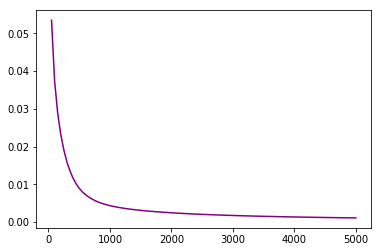

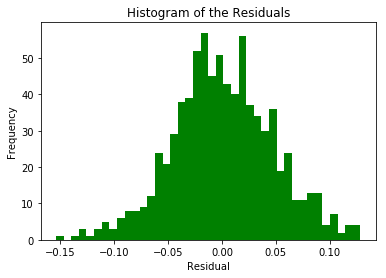

In [2]:
import pandas as pd
import pylab
from pylab import *
import matplotlib.pyplot as plt


# this is the code for problem 3-3, all of 97 variants are considered.
def stochastic_gradient_descent(alpha, X, y, max_iter):
    iter = 0
    m, n = X.shape  # num of samples: m ; num of varibales : n

    theta = 1e-4 * np.random.rand(n, 1)  # init theta (n,1)

    y_predict = X.dot(theta)  # get the predict value of price, X is a matrix

    batch = 100
    # total error, J(theta)
    J = 0.5 * sum([(y_predict[i] - y[i]) ** 2 for i in range(m)]) / m

    itertimes = []
    Jinit = 0
    loss_history = []
    iter_over = False
    # Iterate Loop
    while not iter_over:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        r = np.random.permutation(m)  # 打乱顺序
        X_training = X[r[0:batch], :]  # (batch, n)， 提取打乱顺序后的前batch个sample
        y_training = y[r[0:batch], :]  # (batch, 1)
        y_predict_traing = y_predict[r[0:batch], :]

        # get the gradient
        d_theta = X_training.T.dot(y_predict_traing - y_training) / batch  # (n, 1)

        # update, get the new theta, y_predict, loss in this iteration, store the residuals for analysis
        theta = theta - alpha * d_theta
        y_predict = X.dot(theta)
        loss = 0.5 * sum([(y_predict[i] - y[i]) ** 2 for i in range(m)]) / m
        res = y_predict - y

        J = loss  # update error
        Jinit = Jinit + J
        base = 50

        iter += 1  # update iter
        if (iter % base == 0):
            loss_history.append(Jinit / base)
            itertimes.append(iter)
            Jinit = 0

        if iter == max_iter:
            print("Max interactions exceeded!")
            iter_over = True

    # print the convergence graph
    figure(1)
    pylab.plot(itertimes, loss_history, 'k-', color='purple')
    return theta, J, res


def read_data(path):
    data = pd.read_excel(path)
    return data


def process_data(path):
    data = read_data(path)
    return np.asarray(data)


if __name__ == '__main__':
    path = 'G:\dd-resource\slides\homework\ML_project\HW2\car_data.xls'
    data = process_data(path)
    alpha = 0.01
    price = data[:, 0].reshape(-1, 1).astype(np.float64) / 10000  # array, from (804,) to (804, 1)
    avr_price = sum([price[i] for i in range(price.shape[0])]) / price.shape[0]
    origin_data = read_data(path)

    # get the discrete key, process them via dummy
    paras = ['Make', 'Model', 'Trim', 'Type']
    for i in range(len(paras)):
        dummy = pd.get_dummies(origin_data[paras[i]])
        origin_data = pd.concat([origin_data, dummy], axis=1)

    data_All = np.asarray(origin_data)
    origin_data = origin_data.drop(paras, axis=1)  # 删除price, Make, Model, Trim, Type列
    origin_data = origin_data.drop('Price', axis=1)
    data_All = np.asarray(origin_data)
    data_All[:, 0] /= 10000
    m, n = data_All.shape
    data_All = np.hstack((data_All, np.ones((data_All.shape[0], 1)))).astype(np.float64)  # add another t0
    y = np.log(price)
    theta, loss, res = stochastic_gradient_descent(alpha, data_All, y, 5000)

    SSE = loss * 2
    SST = sum([(avr_price - price[i]) ** 2 for i in range(m)]) / m
    RS = 1 - SSE / SST
    print("theta is: ", theta)
    print("data_ALL shape is: ", data_All.shape)
    print("the R-square is: ", RS)

    # print the histogram of the residuals
    figure(2)
    plt.hist(res, 40, color='green')
    plt.ylabel('Frequency')
    plt.xlabel('Residual')
    plt.title('Histogram of the Residuals')

    figure(1)
    savefig('fig1')
    figure(2)
    savefig('fig2')
    pylab.show()
